In [10]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
'''
Read Data from File
'''
def read_File(URL):
  dataFile = open\
    (URL,'r')
  Lines = dataFile.readlines()
  dataArray = []
  lineNum = 0
  for line in Lines:
    lineNum += 1
    if lineNum <= 2 or len(line.split()) < 4:
      continue
    dataArray.append(line.split())
  return dataArray

'''
Finds the R ij value
'''
def rijVal(rij):
    return np.sum(rij ** 2) ** 0.5

'''
Calculates rij
'''
def distance_Table(data):
  resultTable = []
  for i in range(len(data)):
    el1 = data[i][0]
    thisElPos = np.asarray(data[i][1:], dtype=float)
    for j in range(i, len(data)):
      el2 = data[j][0]
      if el1 == el2 or (el1 + el2 == 'BN' or el1 + el2 == 'OH'): # if same element then skip
        continue
      thatElPos = np.asarray(data[j][1:], dtype=float)
      distance = [el1 + el2, rijVal(thatElPos - thisElPos)]
      # print("this", data[i], ", that", data[j], ", dist = ", distance)
      resultTable.append(distance)
  return resultTable

'''
Calculates Sum of Delta E electrostatic
With q_O = 0 and q_H = +0.52
'''
def delta_e_electrostatic(url):
  data = read_File(url)
  rij = distance_Table(data)

  # partial charge data
  q_O = 0
  q_H = 0.52
  q_B = 0.3
  q_N = -0.3

  result = 0
  for r in rij:
    type = r[0]
    dist = r[1]
    if type == "BO":
      result += q_B * q_O / dist
    elif type == "NO":
      result += q_N * q_O / dist
    elif type == "BH":
      result += q_B * q_H / dist
    elif type == "NH":
      result += q_N * q_H / dist
    else:
      print("Unknown type: ", type)
      result += 0
  return result

def delta_e_vdw(energy, distanceNum):
  distanceNum = str(format(distanceNum, '.4f'))
  fileURL = \
    "../../geometries/hBN_water_geometries/supercells_one_water/diff_h/hBN_water_Oup_Hdown_3x3x1_supercell_h_" \
      + distanceNum + ".xyz"
  e_electrostatic = delta_e_electrostatic(fileURL)
  print("Calculating E_electrostatic from: ", distanceNum, ", elctrostatic energy: ", e_electrostatic)
  return energy - e_electrostatic

def RMS(ary1, ary2):
  if (len(ary1) != len(ary2)):
    print("RMS Error: ary1 and ary2 have different dimensions!")
    return -1
  return np.sum(((np.array(ary1) - np.array(ary2)) ** 2 / len(ary1)) ** 0.5)
  
'''
Calculates rij, but returns 4 arrays
'''
def distance_Table_Separate_Array(data):
  dTBO = []
  dTBH = []
  dTNO = []
  dTNH = []
  for i in range(len(data)):
    el1 = data[i][0]
    thisElPos = np.asarray(data[i][1:], dtype=float)
    for j in range(i, len(data)):
      el2 = data[j][0]
      if el1 == el2 or (el1 + el2 == 'BN' or el1 + el2 == 'OH'): # if same element then skip
        continue
      thatElPos = np.asarray(data[j][1:], dtype=float)
      distance = [rijVal(thatElPos - thisElPos)]
      if el1 + el2 == 'BO':
        dTBO.append(distance)
      elif el1 + el2 == 'BH':
        dTBH.append(distance)
      elif el1 + el2 == 'NO':
        dTNO.append(distance)
      elif el1 + el2 == 'NH':
        dTNH.append(distance)
  return dTBO, dTBH, dTNO, dTNH


In [7]:
# test1 = distance_Table(read_File(testURL))
# print(test1)
dEElectro = delta_e_electrostatic("../../geometries/hBN_water_geometries/supercells_one_water/diff_h/hBN_water_Oup_Hdown_3x3x1_supercell_h_2.9907.xyz")
print(dEElectro)
testa = delta_e_vdw(0, 2.9907)
print(testa)

0.03448770318230059
Calculating E_electrostatic from:  2.9907 , elctrostatic energy:  0.03448770318230059
-0.03448770318230059


In [12]:
listOfSheetDistance = [2.9907, 3.1944, 3.3889, 3.5926, 3.7963, 4.5000, 5.0093, 6.0093]
listOfRPAData = [-29.313725490196063, -62.175018155410314, -69.94190268700073, -66.72476397966595, -57.23311546840961, -27.153231663035584, -13.620189, -2.247640]
# listOfE_vdw = []
# for i in range(len(listOfRPAData)):
#   listOfE_vdw.append(delta_e_vdw(listOfDFTData[i], listOfSheetDistance[i]))

# fig, ax = plt.subplots()
# plt.title("E_vdw (meV) Vs. Sheet Distance (A)")
# ax.set_xlabel('Sheet Distance (A)',fontsize=12)
# ax.set_ylabel('E_vdw (meV)',fontsize=12)
# ax.plot(listOfSheetDistance, listOfRPAData, "o-",label="RPA")
# # ax.plot(listOfSheetDistance[0:6], listOfDFTData, "o--",label="DFT with Electrostatic")
# fig.set_size_inches(8, 5)
# fig.set_dpi(100)
# plt.hlines(y=0, xmin=2.9907, xmax=6.0093, color="grey", linestyles="--")
# plt.legend()
# plt.show()


c:\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


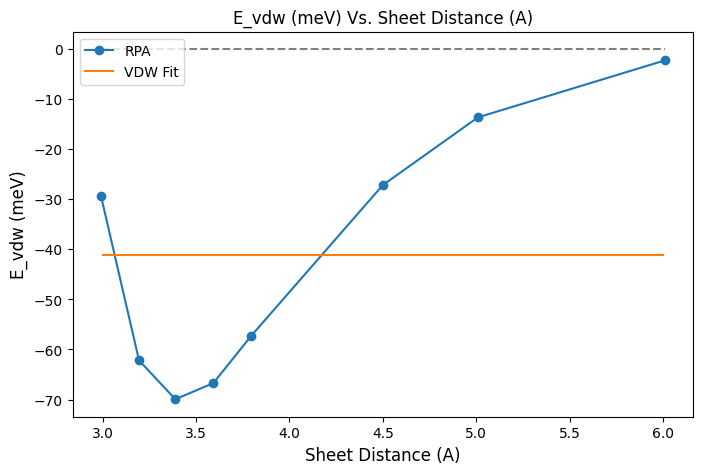

epsBO, epsBH, epsNO, epsNH, sigBO, sigBH, sigNO, sigNH
[15.0053379  26.2706183  51.2148307   8.46509004  2.2958573   1.82822378
  2.26135848  1.79408867]


In [36]:
def vdwA(r, epsBO, epsBH, epsNO, epsNH, sigBO, sigBH, sigNO, sigNH):
  result = []
  print("==========Next Loop")
  for eachR in r:
    print(eachR)
    data = read_File("../../geometries/hBN_water_geometries/supercells_one_water/diff_h/hBN_water_Oup_Hdown_3x3x1_supercell_h_"+ str(format(eachR, '.4f')) + ".xyz")
    dTBO, dTBH, dTNO, dTNH = distance_Table_Separate_Array(data)
    result.append( 4 * (epsBO * np.sum((sigBO / dTBO)**12 - (sigBO / dTBO)**6) + \
      epsBH * np.sum((sigBH / dTBH)**12 - (sigBH / dTBH)**6) + \
      epsNO * np.sum((sigNO / dTNO)**12 - (sigNO / dTNO)**6) + \
      epsNH * np.sum((sigNH / dTNH)**12 - (sigNH / dTNH)**6)) )
  return result

def vdwB(r, epsBO, epsBH, epsNO, epsNH, sigBO, sigBH, sigNO, sigNH):
  result = []
  print("==========Next Loop")
  for eachR in r:
    print(eachR)
    data = read_File("../../geometries/hBN_water_geometries/supercells_one_water/hBN_water_Oup_Hdown_1x1x1_supercell.xyz")
    dTBO, dTBH, dTNO, dTNH = distance_Table_Separate_Array(data)
    result.append( 4 * (epsBO * np.sum((sigBO / dTBO)**12 - (sigBO / dTBO)**6) + \
      epsBH * np.sum((sigBH / dTBH)**12 - (sigBH / dTBH)**6) + \
      epsNO * np.sum((sigNO / dTNO)**12 - (sigNO / dTNO)**6) + \
      epsNH * np.sum((sigNH / dTNH)**12 - (sigNH / dTNH)**6)) )
  return result

def vdwC(r, epsBO, epsBH, epsNO, epsNH, sigBO, sigBH, sigNO, sigNH):
  data = read_File("../../geometries/hBN_water_geometries/supercells_one_water/hBN_water_Oup_Hdown_1x1x1_supercell.xyz")
  dTBO, dTBH, dTNO, dTNH = distance_Table_Separate_Array(data)
  return 4 * (epsBO * np.sum((sigBO / dTBO)**12 - (sigBO / dTBO)**6) + \
    epsBH * np.sum((sigBH / dTBH)**12 - (sigBH / dTBH)**6) + \
    epsNO * np.sum((sigNO / dTNO)**12 - (sigNO / dTNO)**6) + \
    epsNH * np.sum((sigNH / dTNH)**12 - (sigNH / dTNH)**6))

RPApoptVDW, RPApcovVDW = curve_fit(vdwC, listOfSheetDistance, listOfRPAData)


fitX = np.linspace(3, 6, 50)
vCResult = []
for x in fitX:
  vCResult.append(vdwC(x, *RPApoptVDW))

fig, ax = plt.subplots()
plt.title("E_vdw (meV) Vs. Sheet Distance (A)")
ax.set_xlabel('Sheet Distance (A)',fontsize=12)
ax.set_ylabel('E_vdw (meV)',fontsize=12)
ax.plot(listOfSheetDistance, listOfRPAData, "o-",label="RPA")
ax.plot(fitX, vCResult,label="VDW Fit")
fig.set_size_inches(8, 5)
fig.set_dpi(100)
plt.hlines(y=0, xmin=2.9907, xmax=6.0093, color="grey", linestyles="--")
plt.legend()
plt.show()

print("epsBO, epsBH, epsNO, epsNH, sigBO, sigBH, sigNO, sigNH")
print(RPApoptVDW)